In [418]:
%matplotlib inline
import pylab as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats
import datetime as dt
import random
from IPython.display import display

In [419]:
sns.set_context("notebook", font_scale=2)

In [420]:
raw_data = pd.read_csv('/Users/tom/Downloads/Wine Tasting Data - Sheet1.csv')

In [421]:
raw_data['tasting_order'] = raw_data.groupby('person_name').cumcount()

In [422]:
wine_mapping = pd.read_csv('/Users/tom/Downloads/Wine Mapping - Sheet1.csv')

In [423]:
data = raw_data.merge(wine_mapping, left_on='wine_number', right_on='number')

# Counts of Wine Varieties

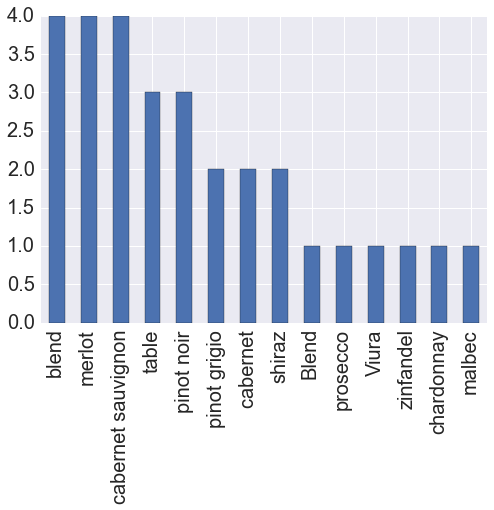

In [424]:
wine_mapping.variety.value_counts().plot(kind='bar')

# Best and worst varieties of wine

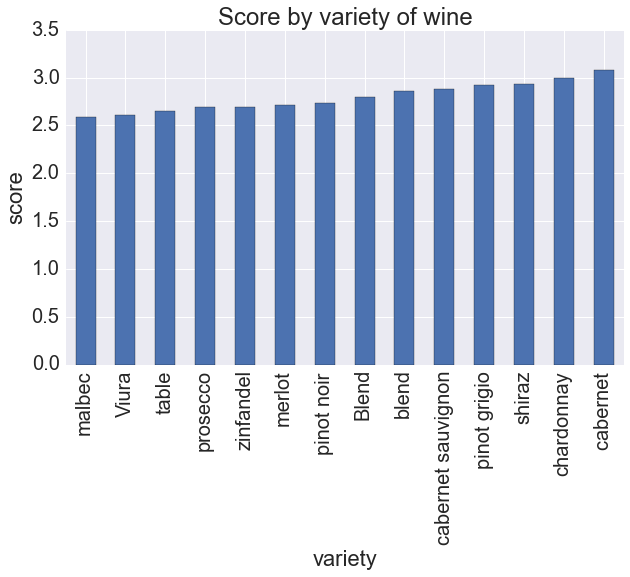

In [425]:
data.groupby('variety').score.mean().sort_values().plot(kind='bar', figsize=(10,6), title='Score by variety of wine')
plt.ylabel('score')

# Best and worst wines

In [426]:
sorted_wines = data.groupby(['wine_name', 'variety']).score.mean().sort_values()

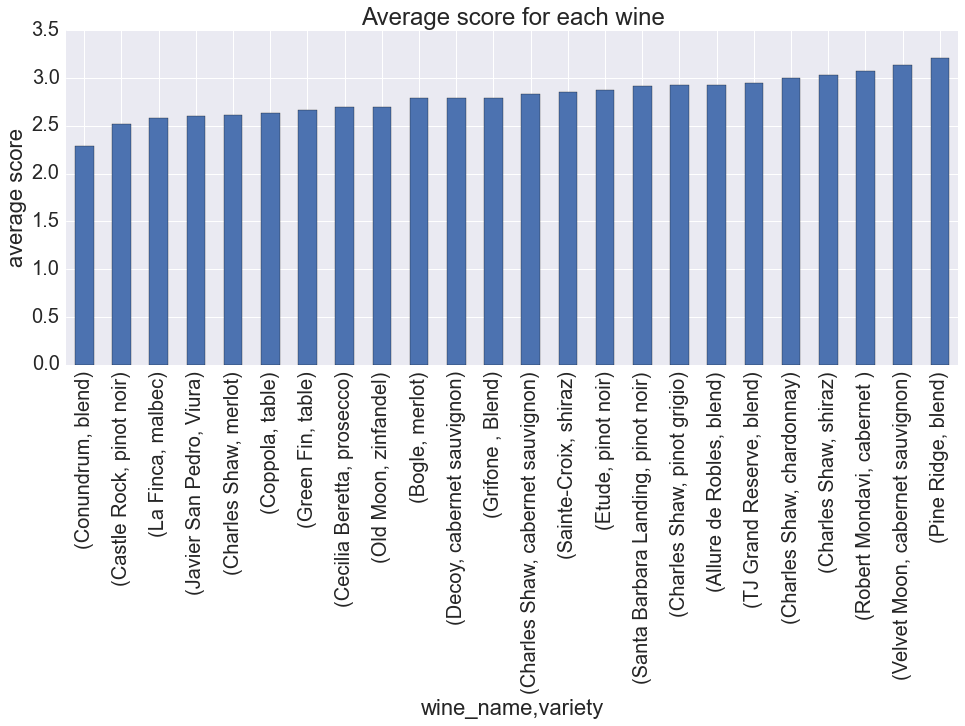

In [427]:
sorted_wines.plot(kind='bar', figsize=(16,6), title='Average score for each wine')
plt.ylabel('average score')

# Red vs. white

In [428]:
data['type'] = data['type'].str.strip()

In [429]:
data.groupby('type').score.mean().sort_values()

type
red      2.805085
white    2.806557
Name: score, dtype: float64

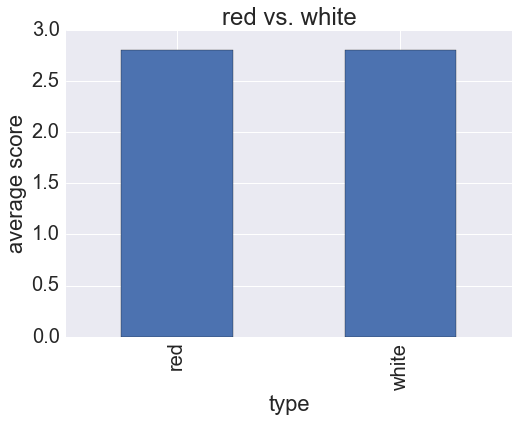

In [430]:
data.groupby('type').score.mean().sort_values().plot(kind='bar', title='red vs. white')
plt.ylabel('average score')

# Who liked the wines the most?

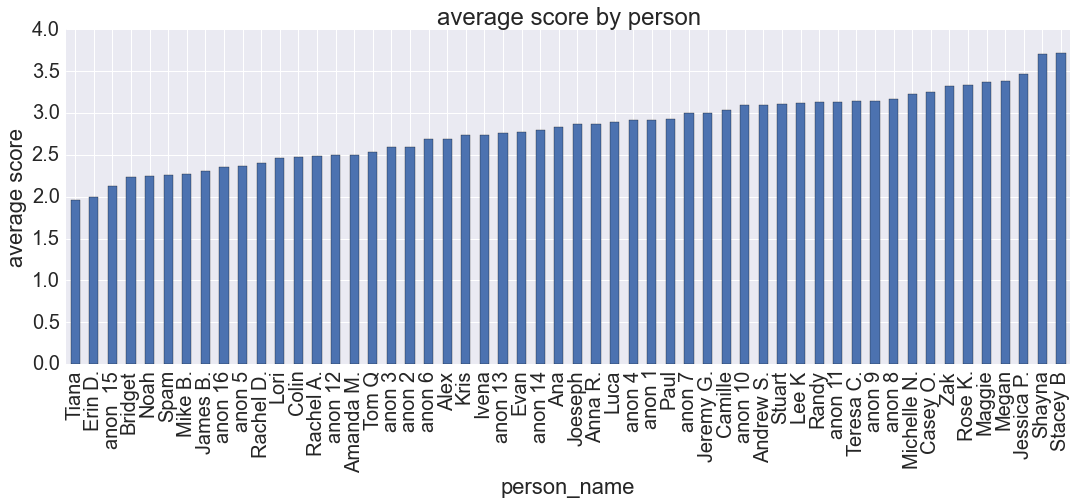

In [431]:
data.groupby('person_name').score.mean().sort_values().plot(kind='bar', figsize=(18, 6), title='average score by person')
plt.ylabel('average score')

# Relationship of price and score

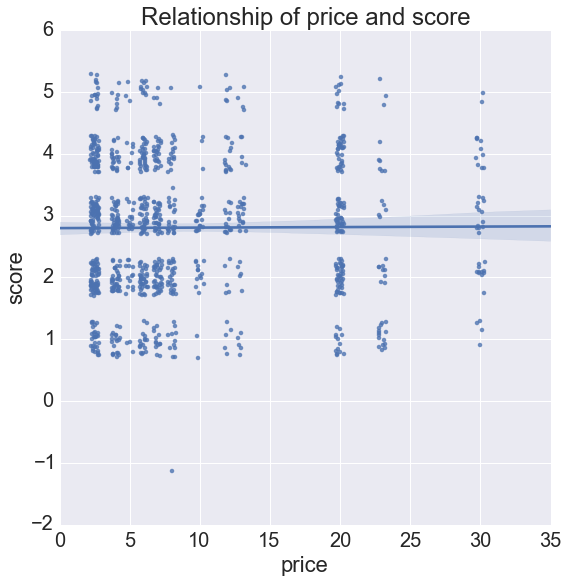

In [432]:
sns.lmplot(x="price", y="score", data=data, size=8, x_jitter=0.3, y_jitter=0.3)
plt.title('Relationship of price and score')

The shaded blue area is the 95% confidence interval for the linear regression fit. There's no significant correlation.

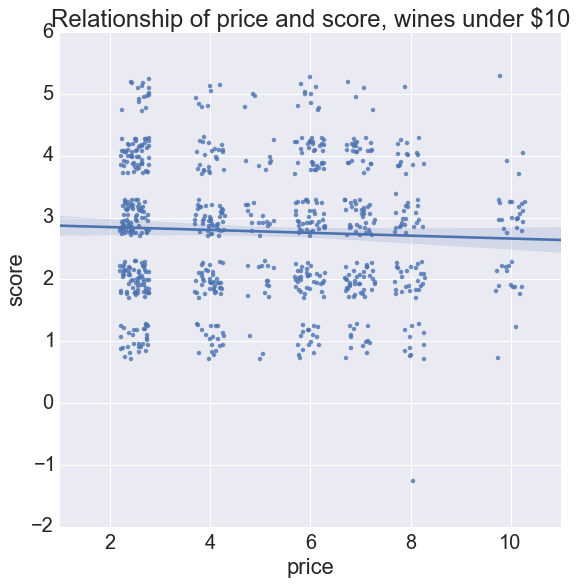

In [433]:
sns.lmplot(x="price", y="score", data=data[data.price < 10.0], size=8, x_jitter=0.3, y_jitter=0.3)
plt.title('Relationship of price and score, wines under $10')

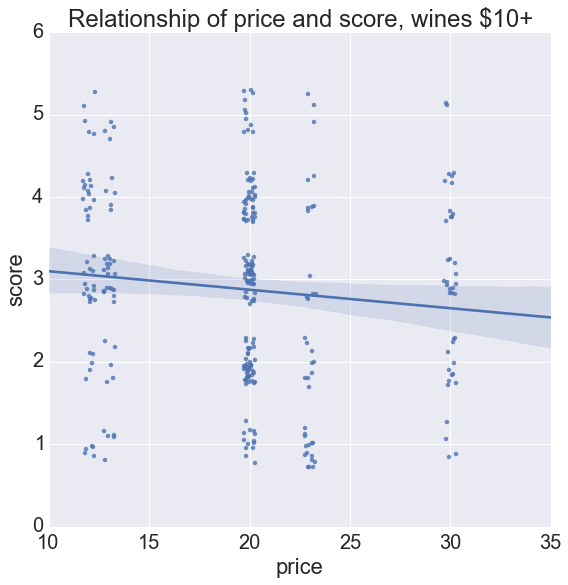

In [434]:
sns.lmplot(x="price", y="score", data=data[data.price >= 10], size=8, x_jitter=0.3, y_jitter=0.3)
plt.title('Relationship of price and score, wines $10+')

# Relationship of price and price guess

(0, 60)

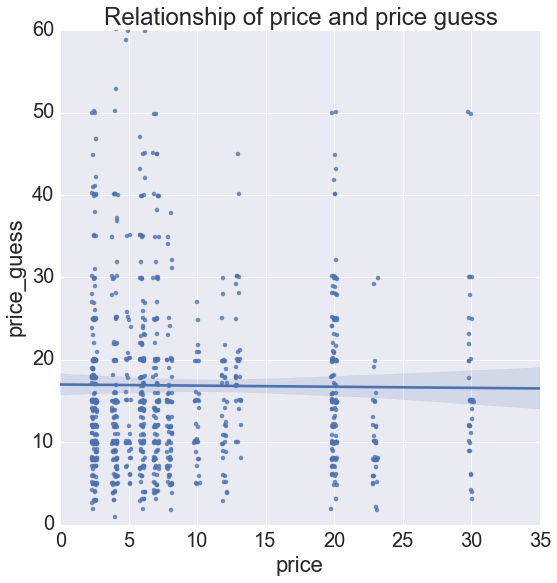

In [435]:
sns.lmplot(x="price", y="price_guess", data=data, size=8, x_jitter=0.2, y_jitter=0.2)
plt.title('Relationship of price and price guess')
plt.ylim(ymin=0, ymax=60)

# Best price guessers

In [436]:
data['abs_price_error'] = (data['price'] - data['price_guess']).abs()

In [437]:
price_guesses = data.groupby('person_name').abs_price_error.agg(['mean', 'count']).sort_values('mean')
price_guesses.columns = ['Avg. Price Error', 'Number of Wines Priced']

In [438]:
price_guesses

,Avg. Price Error,Number of Wines Priced
person_name,,
Anna R.,3.005000,8
Amanda M.,3.255000,4
Ana,5.802000,5
Tiana,6.051379,29
Lori,6.273077,13
Rachel D.,6.438000,30
anon 4,6.554667,30
Mike B.,6.802000,15
Erin D.,6.930000,7


# Score as the night wore on

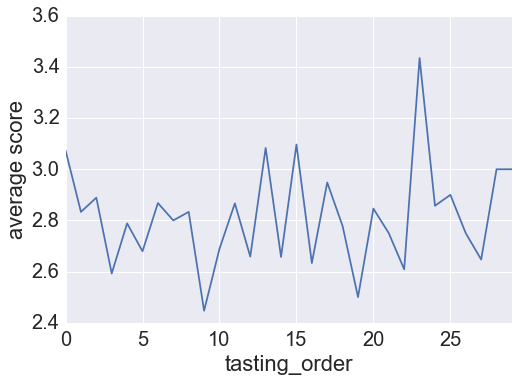

In [439]:
data.groupby('tasting_order').score.mean().plot()
plt.ylabel('average score')

There's no obvious trend in score as people tasted more wines, it mostly looks random.

# Trying the same wine twice

In [440]:
def get_avg_score_diff(df):
    if len(df) > 1:
        return df.score.diff().abs().mean()
same_wine_avg_diff = data.groupby(['person_name', 'wine_name', 'variety']).apply(get_avg_score_diff).dropna().mean()

In [441]:
same_person_avg_diff = data.groupby(['person_name']).apply(get_avg_score_diff).dropna().mean()

In [442]:
same_wine_diffs = pd.Series([same_wine_avg_diff, same_person_avg_diff], index=['same person same wine', 'same person'])

In [443]:
same_wine_diffs

same person same wine    1.037791
same person              1.155291
dtype: float64

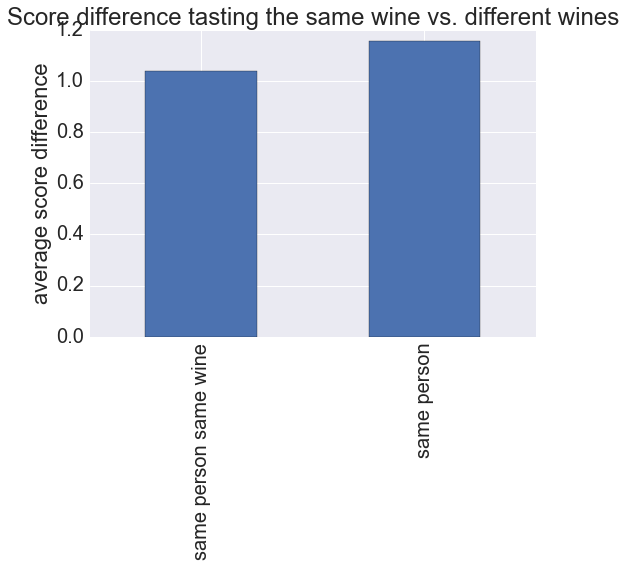

In [444]:
same_wine_diffs.plot(kind='bar', title='Score difference tasting the same wine vs. different wines')
plt.ylabel('average score difference')

On average, when a single person tasted the same wine twice and didn't know it, they gave it a score that differed by 1.04 points. This is only slightly smaller than the average difference of a person scoring two different wines, which was 1.16 points.

In [445]:
data.to_csv('full_wine_tasting_results.csv', index=False)